In [2]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [20]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [3]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [4]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [5]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [6]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [7]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [8]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [9]:
n_epochs = 40
batch_size = 50

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [11]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                           y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.82 Val accuracy: 0.9034
1 Train accuracy: 0.88 Val accuracy: 0.9254
2 Train accuracy: 0.92 Val accuracy: 0.9332
3 Train accuracy: 0.94 Val accuracy: 0.9402
4 Train accuracy: 0.94 Val accuracy: 0.9462
5 Train accuracy: 0.98 Val accuracy: 0.9508
6 Train accuracy: 0.98 Val accuracy: 0.9544
7 Train accuracy: 0.98 Val accuracy: 0.9596
8 Train accuracy: 0.98 Val accuracy: 0.9604
9 Train accuracy: 1.0 Val accuracy: 0.9646
10 Train accuracy: 0.98 Val accuracy: 0.9652
11 Train accuracy: 0.98 Val accuracy: 0.9678
12 Train accuracy: 0.98 Val accuracy: 0.9684
13 Train accuracy: 1.0 Val accuracy: 0.9708
14 Train accuracy: 0.98 Val accuracy: 0.971
15 Train accuracy: 0.96 Val accuracy: 0.9694
16 Train accuracy: 0.96 Val accuracy: 0.973
17 Train accuracy: 0.98 Val accuracy: 0.9744
18 Train accuracy: 0.98 Val accuracy: 0.9736
19 Train accuracy: 0.92 Val accuracy: 0.9728
20 Train accuracy: 1.0 Val accuracy: 0.974
21 Train accuracy: 1.0 Val accuracy: 0.9762
22 Train accuracy: 0.98 Val

In [12]:
mnist.train.num_examples

55000

In [13]:
import numpy as np

In [14]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [15]:
y_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4], dtype=int64)

In [16]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

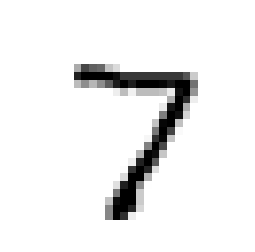

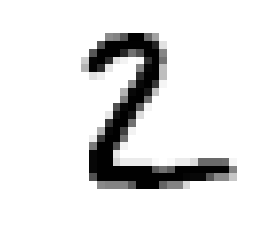

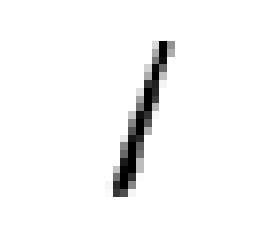

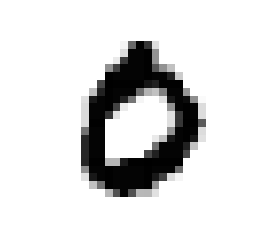

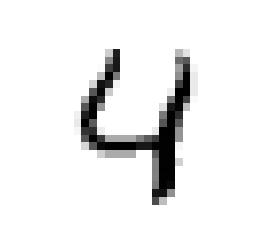

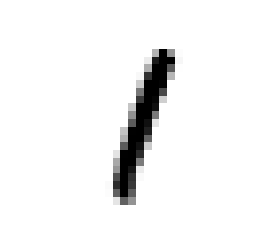

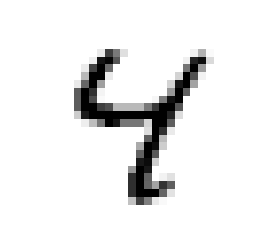

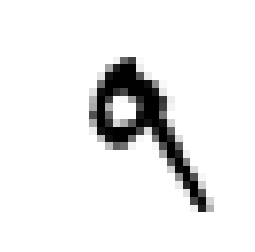

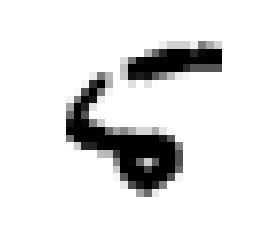

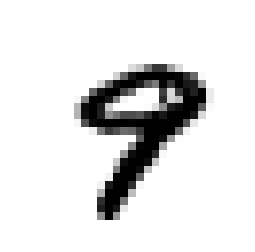

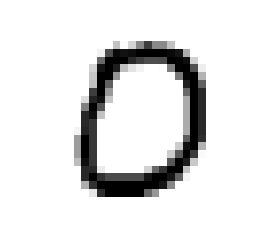

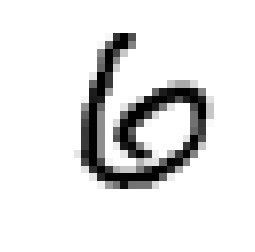

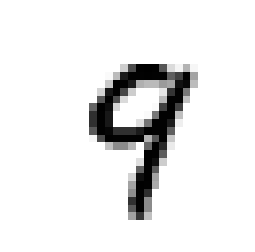

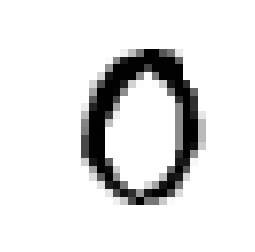

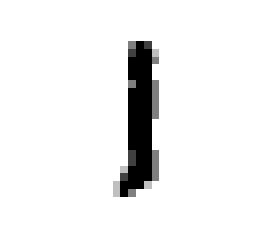

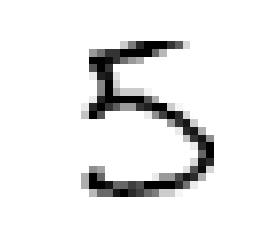

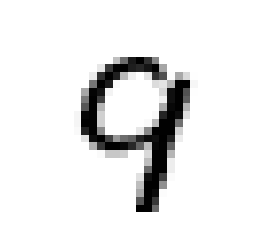

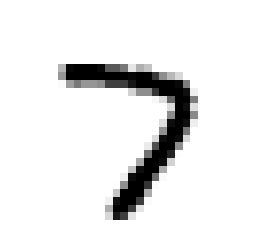

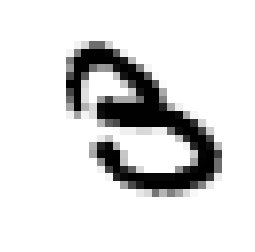

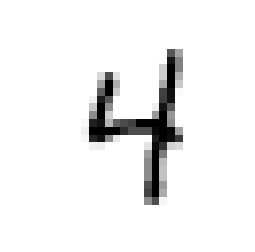

In [17]:
#function for visualising mnist
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

for some_digit in range(20):
    
    a = X_new_scaled[some_digit].reshape(28, 28)
    plt.imshow(a, cmap = matplotlib.cm.binary,interpolation="nearest")
    plt.axis("off")
    plt.show()


In [22]:
from functools import partial

In [23]:
reset_graph()

batch_norm_momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name='training')

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()

    my_batch_norm_layer = partial(
            tf.layers.batch_normalization,
            training=training,
            momentum=batch_norm_momentum)

    my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=he_init)

    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden2, name="hidden2")
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    logits_before_bn = my_dense_layer(bn2, n_outputs, name="outputs")
    logits = my_batch_norm_layer(logits_before_bn)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()